# Analysis:

1.Describe the data
 
 a.Descriptive statistics, data type, etc.

2.Analyze the text comment/ review and share the findings
  
  Convert the ratings into 2 classes
   
   a.Class: Bad when Rating <=3
   
   b.Class: Good otherwise

3.Develop a model to predict the Rating class (created above)
  Focus on steps to build a model

4.Which algorithm can be used and why
  Share the findings of the model.

In [1]:
#importing all the essential modules:
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Accessing datafile 
df = pd.read_csv("Womens_Clothing_E_Commerce_Reviews.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
#checking all columns
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [4]:
# showing datatpes of whole dataset
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
# dropping unnecesary columns 
df.drop(df.columns[0],inplace=True,axis=1)

# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]
    
# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

print("Missing Values: {}".format(df.isnull().sum().sum())) #missing values
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

# Create New Variables: 
# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)
# Character Length
df["Character Count"] = df['Review Text'].apply(len)

Missing Values: 2966
Dataframe Dimension: 22628 Rows, 9 Columns


In [6]:
#describing al statistical values
df.describe()


,Age,Rating,Recommended IND,Positive Feedback Count,Word Count,Character Count
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,43.282880,4.183092,0.818764,2.631784,60.211950,308.761534
std,12.328176,1.115911,0.385222,5.787520,28.533053,143.934126
min,18.000000,1.000000,0.000000,0.000000,2.000000,9.000000
25%,34.000000,4.000000,1.000000,0.000000,36.000000,186.000000
50%,41.000000,5.000000,1.000000,1.000000,59.000000,302.000000
75%,52.000000,5.000000,1.000000,3.000000,88.000000,459.000000
max,99.000000,5.000000,1.000000,122.000000,115.000000,508.000000


# Description of the data

AttributeError: module 'matplotlib' has no attribute 'normpdf'

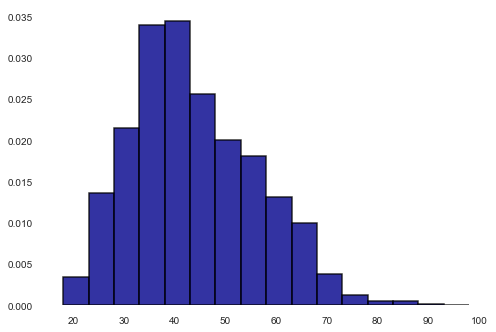

In [7]:
#Create bin to store ages
age_bin= np.arange(18, 100, 5)
#Average age
age_avg = np.average(df['Age'])
#age standard devation
age_std = np.std(df['Age'])

#Create histogram
plt.hist(df['Age'], bins = age_bin, alpha = 0.8, edgecolor='black', linewidth =1.5, color ='darkblue', density= 1)

#Add a fit
y = mpl.normpdf( age_bin, age_avg, age_std)
l = plt.plot(age_bin, y, 'r--', linewidth=1)

#Set x axis ticks to match bins
plt.xticks(age_bin)

#Add labels and title
plt.xlabel("Age")
plt.ylabel("Age Probability Density")
plt.title("Age Distribution")

#Add average line
plt.axvline(age_avg, color='green', linestyle = 'dashed', linewidth= 2)

#Use grey background
plt.style.use('bmh')

#Display histogram
plt.show()

From the plot above, the histogram is skewed to the right, there appears to be a normal distribution of the ages. The average age is somewhere around 40. The main demographic of the
It is possible that some users are faking their age, in particular those aged 90+. They might be removed in cleaning the datase

In [ ]:
#Create bin for rating
rating_bin = np.arange(1, 6, 1)

#Create histogram
plt.hist(df['Rating'], bins = rating_bin, alpha = 0.8, edgecolor='black', linewidth =1.5, color ='darkblue', density= 1)

#Add labels and title
plt.xlabel("Rating")
plt.ylabel("Rating Probability Density")
plt.title("Rating Distribution")

#Set x axis ticks to match bins
plt.xticks(rating_bin)

plt.show()

The histogram is clearly skewed to the left. The majority of reviews are positive.


In [ ]:
#Create wedges and corresponding labels for column in dataframe.
def NameCount (df_in, column):
    #Store unique entries 
    names = df_in[column].unique()
    #remove nans
    names = [x for x in names if str(x) != 'nan']
    #Create array to store values
    count = np.empty(len(names))
    #Store recurrence of each value
    for i in range(len(names)):
        count[i] = df[(df[column] == names[i])].shape[0]
    return names, count

In [ ]:
#Division
div_name, div_count = NameCount(df, 'Division Name')
#Department 
dep_name, dep_count = NameCount(df, 'Department Name')
#Class
class_name, class_count = NameCount(df, 'Class Name')
plt.pie(div_count, labels=div_name, autopct='%1.1f%%', shadow=True, radius= 1)
plt.title("Division", fontsize = 20)
plt.show()

as we can see from PIE chart 59.1% contains Genreal Division,
                             6.3% contains Intimates divison and
                            34.6%  contains General petite

In [ ]:
plt.pie(dep_count, labels=dep_name, autopct='%1.1f%%', shadow=True, radius= 1)
plt.title("Department", fontsize = 20)
plt.show()

AS we can see from graph (1)16.2% Bottoms, (2.)27.2%Dresses, (3.)44.4% Tops, (4.)7.3%Intimate, (5.)0.5% Trend, (6.)4.4% Jackets in Department Section

# Analyzing the text comment/ review


In [ ]:
#Taking random text such as Revies and Title
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

In [ ]:
#installing wordcloud lib if not insatlled
#import sys
#!{sys.executable} -m pip install wordcloud

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

In [ ]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

In [ ]:
huevar = "Recommended IND"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

# According to Graph:

Nearly 80% sentiment are positive having Recommended IND as 1.

Below 20% sentiment are positive having Recommended IND as 0.

Below 60% sentiment are neutral having Recommended IND as 1.

Nearly 50% sentiment are neutral having Recommended IND as 0.

Above 30%  sentiment are negative having Recommended IND as 1.

Above 60%  sentiment are negative having Recommended IND as 0.

In [ ]:
f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

# From the Graph:

1)More than 20,000 are positive sentiments. || (4) 12,000+ have rating of 5. ||(7)Very few neutral sentiments has a rating of 5 

2)Less than 2500 are neagtive sentiments.   || (5) rarting of 4 ranges from 4,000 to 6,000.||(8)about 40% of Negative sentiments has a rarting of 1 

3)very few Neutral  sentiments.             || (6)Nearly 100% of positive sentiments has rating 5.||(9)Nearly 60% positive sentiments tends to have 5 rating 

10)Nearly 10% of Neutral sentiments tend to have 5 rating

11)About 30% of Neutral sentiments tend to have 3 rating

12)Less than 15% Negative sentiments tend to have 5 rating(in this case it is highest)

13)less than 30% Negative sentiments tend to have 3 rating(in this case it is  highest)

In [ ]:
# Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

# According to Graph:

1)Positive Sentiments:more than 40% recommendations are for tops And about 30% for Dresses

2)Negative Sentiments:more than 40% recommendations are for tops And less than 30% for Dresses

3)Neutral Sentiments:more than 40% recommendations are for tops And less than  30% for Dresses

4)Positive Sentiments:more than 40% recommnedation has a rating of 3

5)Negative Sentiments:about 35% recommnedation has a rating of 3

6)Neutral  Sentiments:about 35% recommnedation has a rating of 3  

In [ ]:
# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df["Positive Feedback Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()

In [ ]:
#import sys
#!{sys.executable} -m pip install plotly

In [ ]:
cv = df['Class Name'].value_counts()
df1=df['Rating'].value_counts().to_frame()
avgdf1 = df.groupby('Class Name').agg({'Rating': np.average})

trace = go.Scatter3d( x = avgdf1.index,
                      y = avgdf1['Rating'],
                      z = cv[avgdf1.index],
                      mode = 'markers',
                      marker = dict(size=10,color=avgdf1['Rating']),
                      hoverinfo ="text",
                      text="Class: "+avgdf1.index+" \ Average Rating: "+avgdf1['Rating'].map(' {:,.2f}'.format).apply(str)+" \ Number of Reviewers: "+cv[avgdf1.index].apply(str)
                      )

data = [trace]
layout = go.Layout(title="Average Rating & Class & Number of Reviewers",
                   scene = dict(
                    xaxis = dict(title='Class'),
                    yaxis = dict(title='Average Rating'),
                    zaxis = dict(title='Number of Sales'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plt.savefig('3D_Scatter.png')

# According to this 3D Graph:

1.class Dresses has an avg rating of 4.14 and reviewed by 6000+ people.

2.class Knits has an avg rating of 4.15 and reviewed by 4000+ people.

3.class Blouses has an avg rating of 4.14 and reviewed by 2983 people.

4.class Jeans has an avg rating of 4.35 and reviewed by 1104 people.

5.class Trends has an avg rating of 3.84 and reviewed by 118 people.

6.class pants has an avg rating of 4.26 and reviewed by 1300+ people.

ETC....

# Converting the ratings into 2 classes
Class: Bad when Rating <=3
Class: Good otherwise

In [ ]:
df["Class"] = "Bad"
df.loc[df.Rating >= 3,["Class"]] = "Good"

In [ ]:
for i in df.columns[df.isna().any()].tolist():
    print(i,'has',df[df[i].isna()==True].shape[0],'Null Values')

In [ ]:
df['Rating'].unique()

In [ ]:
def ret(rating):
    if rating>3:
        return 'Good'
    else:
        return 'Bad'

In [ ]:
df = pd.read_csv("Womens_Clothing_E_Commerce_Reviews.csv")
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

# Data Analysis

In [ ]:
df["Class"] = "Bad"
df.loc[df.Rating > 3,["Class"]] = "Good"

In [ ]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] >3) | (df['Rating']<=3)]
X_review=rating_class['Review Text']
y=rating_class['Class']

In [ ]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [ ]:
print(len(bow_transformer.vocabulary_))

In [ ]:
X_review = bow_transformer.transform(X_review)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

#### Data Training

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

In [ ]:
predict=nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

## Model Testing

A Good review example

In [ ]:
rating_positive=df['Review Text'][3]
rating_positive

In [ ]:
#prediction
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

In [ ]:
#actual
df['Class'][3]

A Bad review example

In [ ]:
rating_negative=df['Review Text'][61]
rating_negative

In [ ]:
#prediction
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

In [ ]:
#actual
df['Class'][61]

Randaom Data

In [ ]:
rating_random=df['Review Text'][43]
rating_random

In [ ]:
#prediction
rating_random_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_random_transformed)[0]

In [ ]:
#Actual
df['Class'][43]

# Algorithm used and why:
 
We have used naive bayes classifier as it is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. Naive Bayes model is easy to build and particularly useful for very large datasets. Along with simplicity, Naive Bayes is known to outperform even the most-sophisticated classification methods. It proves to be quite robust to irrelevant features, which it ignores. It learns and predicts very fast and it does not require lots of storage. So, why is it then called naive? The naive was added to the account for one assumption that is required for Bayes to work optimally: all features must be independent of each other. In reality, this is usually not the case; however, it still returns very good accuracy in practice even when the independent assumption does not hold.

Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers are mostly used in text classification (due to their better results in multi-class problems and independence rule) have a higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)

We have also used multivariate method for data analysis
Multivariate analysis provides a more accurate view of the behavior between variables that are highly correlated, and can detect potential problems in a product or process.

# Algorithm Advantages:

It is easy to apply and predicts the class of test data set fast. It also performs well in multi-class prediction
When the assumption of independence holds, a Naive Bayes classifier performs better compared to the other models like logistic regression as you need less training data.
It performs well in the case of categorical input variables compared to a numerical variable(s). For the numerical variable, a normal distribution is assumed (bell curve, which is a strong assumption).

# We have achieved the desired model with 88% accuracy which predicts the Rating class.
